In [1]:
import findspark
findspark.init()
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook
from pyspark import sql, SparkConf, SparkContext
import ipywidgets as ipy
from IPython.display import display, clear_output
from ipywidgets import Output, VBox, widgets, interact


In [2]:
dfPollution = pd.read_csv("Luchtvervuiling.csv", encoding = "windows-1252")

c:\users\dries\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#drop rijen waarvoor alle meting kolommen null/NA zijn
print(len(dfPollution.index))
dfPollution.dropna(subset=['no2', 'so2', 'rspm', 'spm'], thresh=1, how='all', inplace=True)
#drop rijen waarvoor date kolom null/NA is
print(len(dfPollution.index))
dfPollution.dropna(subset=['date'], inplace=True)
print(len(dfPollution.index))

435742
433015
433011


In [4]:
#haal jaren uit date kolom voor filter
years = pd.DatetimeIndex(dfPollution['date']).year.unique().astype(float).map('{:.0f}'.format).astype(str)
years = years.sort_values(ascending=False)

months = ["January","February","March","April","May","June","July","August","September","October","November","December"]

<IPython.core.display.Javascript object>


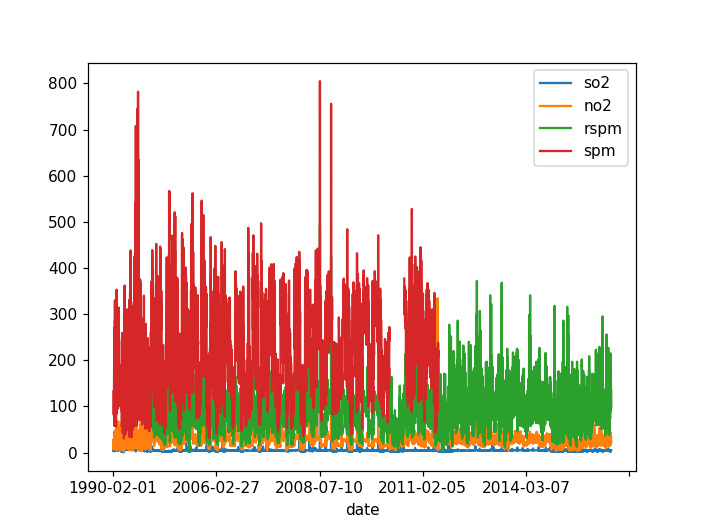

In [17]:
cityFilter = widgets.Dropdown(
    options= dfPollution.location.unique(),
    value = dfPollution.location.unique()[0],
    description='Location:',
    disabled=False,
)
yearFilter = widgets.Dropdown(
    options= years,
    value = years[0],
    description='Year:',
    disabled=False,
)
display(widgets.HBox((cityFilter, yearFilter)))

dfPollution.loc[dfPollution["location"] == dfPollution.location.loc[0]].plot("date", ["so2", "no2", "rspm", "spm"], subplots = False)

def on_change(change):
    if change['name'] == 'value' and (change['new'] != change['old']):
        clear_output()
        display(widgets.HBox((cityFilter, yearFilter)))
        dfPollution.loc[dfPollution["location"] == change['new']].plot("date", ["so2", "no2", "rspm", "spm"], subplots = False)

cityFilter.observe(on_change)
yearFilter.observe(on_change)

